# Excess deaths due to COVID-19

In [7]:
import pandas as pd

import causalpy as cp

In [8]:
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'
seed = 42

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load data

In [9]:
df = (
    cp.load_data("covid")
    .assign(date=lambda x: pd.to_datetime(x["date"]))
    .set_index("date")
)

treatment_time = pd.to_datetime("2020-01-01")
df.head()

,temp,deaths,year,month,t,pre
date,,,,,,
2006-01-01,3.8,49124,2006,1,0,True
2006-02-01,3.4,42664,2006,2,1,True
2006-03-01,3.9,49207,2006,3,2,True
2006-04-01,7.4,40645,2006,4,3,True
2006-05-01,10.7,42425,2006,5,4,True


The columns are:

* `date` + `year`: self explanatory
* `month`: month, numerically encoded. Needs to be treated as a categorical variable
* `temp`: average UK temperature (Celsius)
* `t`: time
* `pre`: boolean flag indicating pre or post intervention

## Run the analysis

In this example we are going to standardize the data. So we have to be careful in how we interpret the inferred regression coefficients, and the posterior predictions will be in this standardized space.

:::{note}
The `random_seed` keyword argument for the PyMC sampler is not necessary. We use it here so that the results are reproducible.
:::

In [10]:
result = cp.InterruptedTimeSeries(
    df,
    treatment_time,
    formula="standardize(deaths) ~ 0 + standardize(t) + C(month) + standardize(temp)",
    model=cp.pymc_models.LinearRegression(sample_kwargs={"random_seed": seed}),
)

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta, sigma]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 151 seconds.
Sampling: [beta, sigma, y_hat]
Sampling: [y_hat]
Sampling: [y_hat]
Sampling: [y_hat]
Sampling: [y_hat]


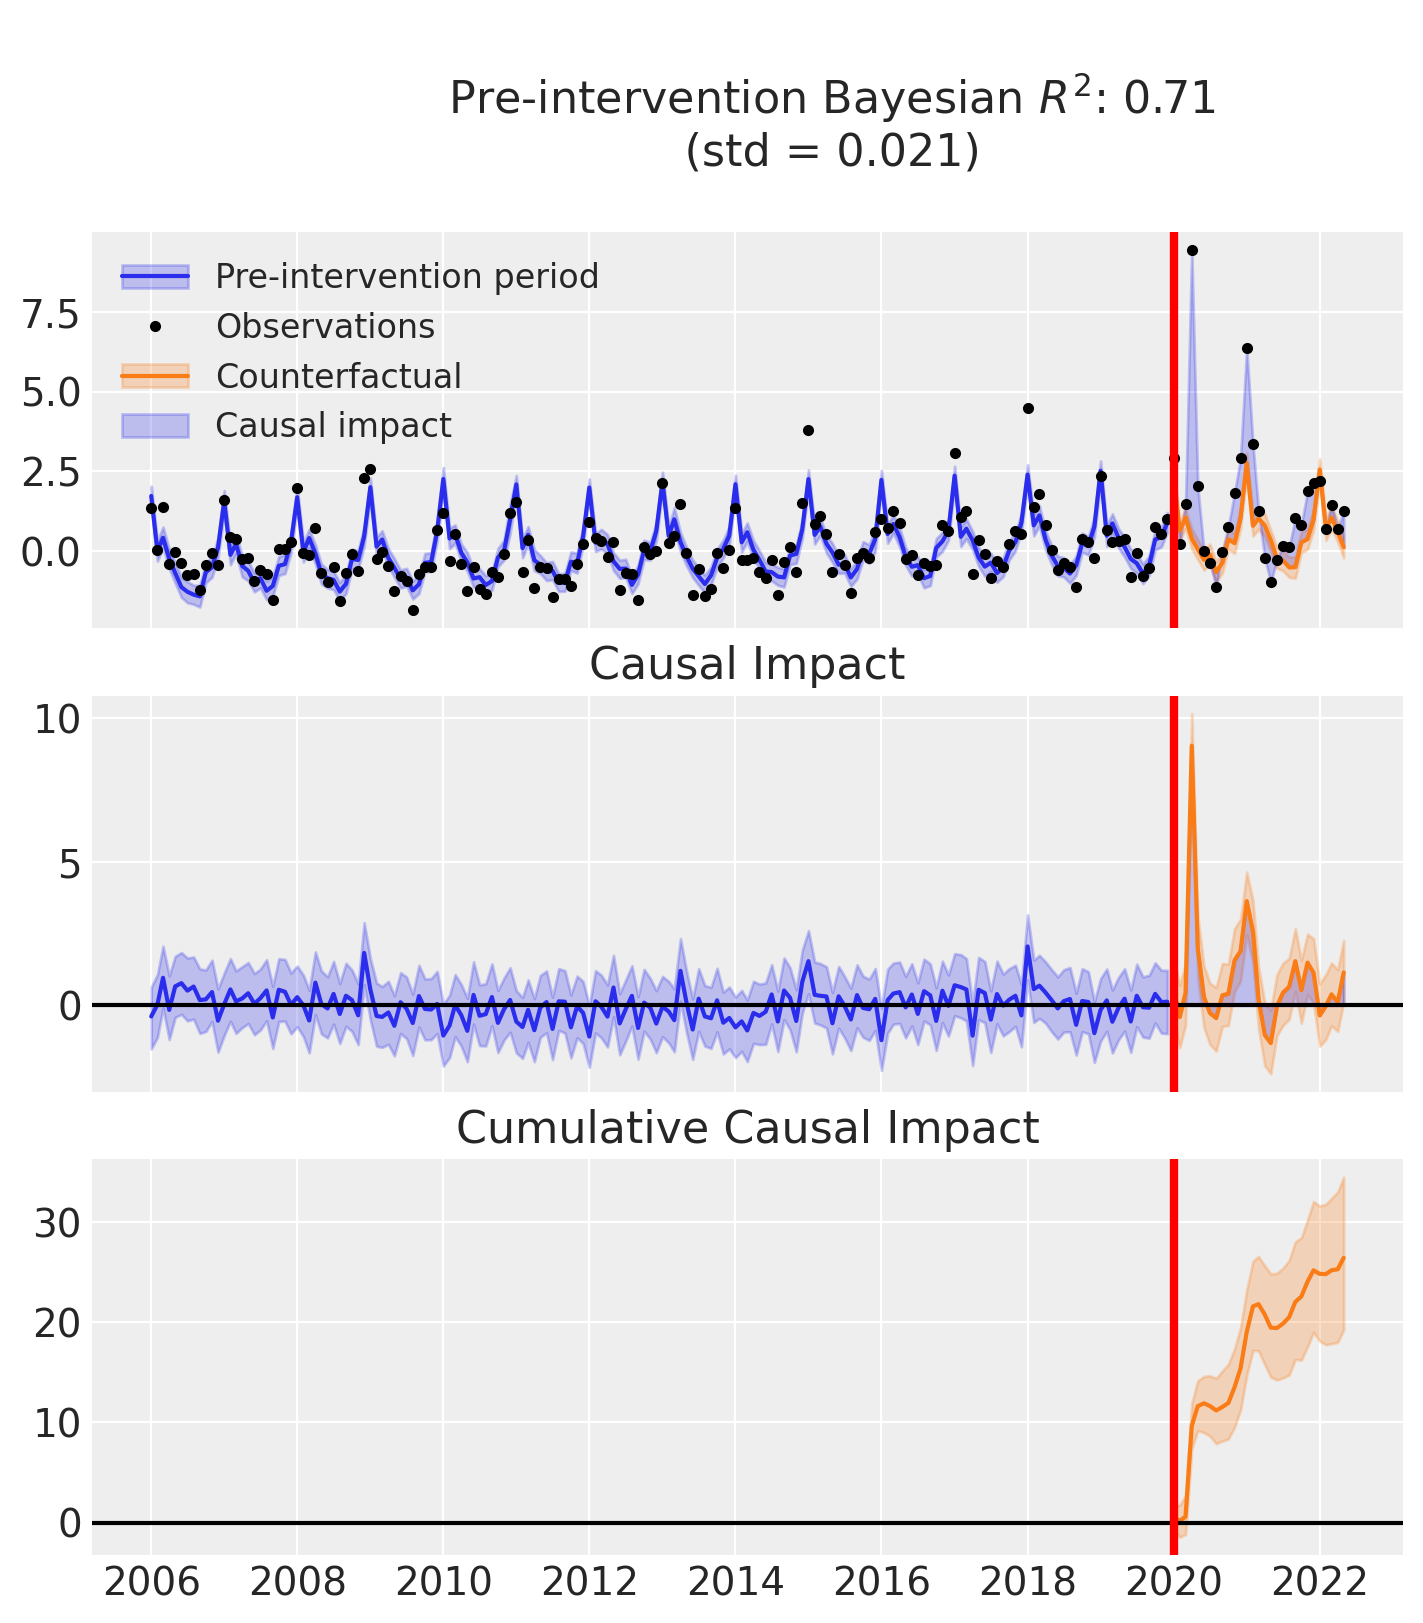

In [11]:
fig, ax = result.plot()

In [13]:
result.summary()

==================================Pre-Post Fit==================================
Formula: standardize(deaths) ~ 0 + standardize(t) + C(month) + standardize(temp)
Model coefficients:
    C(month)[1]        1.6, 94% HDI [1.1, 2]
    C(month)[2]        -0.2, 94% HDI [-0.65, 0.24]
    C(month)[3]        0.26, 94% HDI [-0.11, 0.62]
    C(month)[4]        -0.035, 94% HDI [-0.32, 0.25]
    C(month)[5]        -0.15, 94% HDI [-0.46, 0.14]
    C(month)[6]        -0.21, 94% HDI [-0.62, 0.18]
    C(month)[7]        -0.017, 94% HDI [-0.53, 0.5]
    C(month)[8]        -0.41, 94% HDI [-0.89, 0.043]
    C(month)[9]        -0.44, 94% HDI [-0.81, -0.061]
    C(month)[10]       -0.06, 94% HDI [-0.35, 0.23]
    C(month)[11]       -0.36, 94% HDI [-0.68, -0.029]
    C(month)[12]       0.066, 94% HDI [-0.35, 0.51]
    standardize(t)     0.23, 94% HDI [0.15, 0.31]
    standardize(temp)  -0.45, 94% HDI [-0.73, -0.16]
    sigma              0.55, 94% HDI [0.5, 0.62]
